# add with noise and with channels

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

# training

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 24ms/step - loss: 0.5993 - accuracy: 0.8149 - val_loss: 0.2497 - val_accuracy: 0.9258
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2503 - accuracy: 0.9215 - val_loss: 0.2810 - val_accuracy: 0.9100
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1642 - accuracy: 0.9488 - val_loss: 0.1631 - val_accuracy: 0.9489
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1143 - accuracy: 0.9643 - val_loss: 0.1621 - val_accuracy: 0.9517
Epoch 5/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0848 - accuracy: 0.9729 - val_loss: 0.1475 - val_accuracy: 0.9568
Epoch 6/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.1421 - val_accuracy: 0.9612
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.1228 - val_accuracy: 0.967

# plot the accuracy

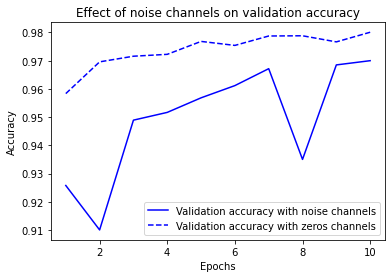

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# fitting the model with randomly shuffled labels

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 7s 15ms/step - loss: 2.3169 - accuracy: 0.1054 - val_loss: 2.3060 - val_accuracy: 0.1072
Epoch 2/100
375/375 [==============================] - 5s 14ms/step - loss: 2.3001 - accuracy: 0.1180 - val_loss: 2.3151 - val_accuracy: 0.1033
Epoch 3/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2895 - accuracy: 0.1284 - val_loss: 2.3210 - val_accuracy: 0.0993
Epoch 4/100
375/375 [==============================] - 6s 15ms/step - loss: 2.2760 - accuracy: 0.1406 - val_loss: 2.3295 - val_accuracy: 0.1052
Epoch 5/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2579 - accuracy: 0.1554 - val_loss: 2.3395 - val_accuracy: 0.1013
Epoch 6/100
375/375 [==============================] - 6s 15ms/step - loss: 2.2374 - accuracy: 0.1678 - val_loss: 2.3500 - val_accuracy: 0.0999
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2138 - accuracy: 0.1824 - val_loss: 2.3698 - val_accuracy:

375/375 [==============================] - 5s 15ms/step - loss: 0.9553 - accuracy: 0.6811 - val_loss: 4.6017 - val_accuracy: 0.0948
Epoch 58/100
375/375 [==============================] - 6s 15ms/step - loss: 0.9420 - accuracy: 0.6864 - val_loss: 4.6378 - val_accuracy: 0.0965
Epoch 59/100
375/375 [==============================] - 6s 15ms/step - loss: 0.9271 - accuracy: 0.6916 - val_loss: 4.6908 - val_accuracy: 0.0978
Epoch 60/100
375/375 [==============================] - 5s 14ms/step - loss: 0.9115 - accuracy: 0.6988 - val_loss: 4.7479 - val_accuracy: 0.0939
Epoch 61/100
375/375 [==============================] - 5s 15ms/step - loss: 0.8973 - accuracy: 0.7008 - val_loss: 4.8262 - val_accuracy: 0.0954
Epoch 62/100
375/375 [==============================] - 6s 15ms/step - loss: 0.8848 - accuracy: 0.7072 - val_loss: 4.8844 - val_accuracy: 0.0972
Epoch 63/100
375/375 [==============================] - 5s 14ms/step - loss: 0.8714 - accuracy: 0.7108 - val_loss: 4.9157 - val_accuracy: 0.095

# improve the model fit
## training with high learning rate

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 15ms/step - loss: 816.9849 - accuracy: 0.3109 - val_loss: 2.1921 - val_accuracy: 0.2070
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 4.7091 - accuracy: 0.2372 - val_loss: 2.6928 - val_accuracy: 0.2264
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 3.4619 - accuracy: 0.2521 - val_loss: 2.2885 - val_accuracy: 0.1950
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 2.6526 - accuracy: 0.2393 - val_loss: 3.1397 - val_accuracy: 0.2412
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 2.5045 - accuracy: 0.2717 - val_loss: 3.3449 - val_accuracy: 0.2819
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 2.3702 - accuracy: 0.2634 - val_loss: 2.2538 - val_accuracy: 0.2956
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 2.8005 - accuracy: 0.2859 - val_loss: 2.1284 - val_accuracy: 0.28

# same model with more apporpriate learning rate

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 15ms/step - loss: 0.3444 - accuracy: 0.9138 - val_loss: 0.1671 - val_accuracy: 0.9553
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1443 - accuracy: 0.9638 - val_loss: 0.1521 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1143 - accuracy: 0.9731 - val_loss: 0.1726 - val_accuracy: 0.9684
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1019 - accuracy: 0.9785 - val_loss: 0.1998 - val_accuracy: 0.9679
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0879 - accuracy: 0.9812 - val_loss: 0.1873 - val_accuracy: 0.9722
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0779 - accuracy: 0.9843 - val_loss: 0.2301 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0737 - accuracy: 0.9858 - val_loss: 0.2470 - val_accuracy: 0.9733

# increasing model capacity

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.6840 - accuracy: 0.8285 - val_loss: 0.3612 - val_accuracy: 0.9026
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3523 - accuracy: 0.9035 - val_loss: 0.3101 - val_accuracy: 0.9133
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3156 - accuracy: 0.9121 - val_loss: 0.2909 - val_accuracy: 0.9175
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2994 - accuracy: 0.9159 - val_loss: 0.2824 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2897 - accuracy: 0.9184 - val_loss: 0.2758 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2829 - accuracy: 0.9206 - val_loss: 0.2743 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2780 - accuracy: 0.9224 - val_loss: 0.2694 - val_accuracy: 0.9268
Epoch 

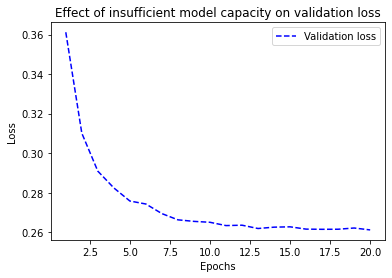

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 7ms/step - loss: 0.3578 - accuracy: 0.8973 - val_loss: 0.1781 - val_accuracy: 0.9498
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1593 - accuracy: 0.9516 - val_loss: 0.1420 - val_accuracy: 0.9593
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.1156 - val_accuracy: 0.9645
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0834 - accuracy: 0.9753 - val_loss: 0.1023 - val_accuracy: 0.9699
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.0972 - val_accuracy: 0.9698
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0903 - val_accuracy: 0.9745
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.1196 - val_accuracy: 0.9683
E

# improve generlization
## orginal model

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 8s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 75ms/step - loss: 0.5101 - accuracy: 0.7906 - val_loss: 0.3824 - val_accuracy: 0.8735
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3057 - accuracy: 0.9026 - val_loss: 0.3019 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2239 - accuracy: 0.9284 - val_loss: 0.2810 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1751 - accuracy: 0.9434 - val_loss: 0.2847 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1395 - accuracy: 0.9589 - val_loss: 0.2794 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1163 - accuracy: 0.9649 - val_loss: 0.2940 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0952 - accurac

# version with lower capacity

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 59ms/step - loss: 0.6302 - accuracy: 0.7191 - val_loss: 0.5634 - val_accuracy: 0.8256
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5070 - accuracy: 0.8621 - val_loss: 0.4770 - val_accuracy: 0.8447
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4174 - accuracy: 0.8928 - val_loss: 0.4069 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3485 - accuracy: 0.9087 - val_loss: 0.3593 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2955 - accuracy: 0.9183 - val_loss: 0.3265 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2551 - accuracy: 0.9269 - val_loss: 0.3018 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2233 - accuracy: 0.9341 - val_loss: 0.3001 - val_accuracy: 0.8830
Epoch 8/20
30

# version with higher 

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 240ms/step - loss: 0.5678 - accuracy: 0.7346 - val_loss: 0.3115 - val_accuracy: 0.8815
Epoch 2/20
30/30 [==============================] - 6s 194ms/step - loss: 0.2543 - accuracy: 0.8978 - val_loss: 0.2671 - val_accuracy: 0.8927
Epoch 3/20
30/30 [==============================] - 6s 200ms/step - loss: 0.1674 - accuracy: 0.9371 - val_loss: 0.2816 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 6s 196ms/step - loss: 0.0781 - accuracy: 0.9715 - val_loss: 0.5636 - val_accuracy: 0.8265
Epoch 5/20
30/30 [==============================] - 6s 196ms/step - loss: 0.0879 - accuracy: 0.9763 - val_loss: 0.2993 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 6s 195ms/step - loss: 0.0071 - accuracy: 0.9997 - val_loss: 0.5315 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 6s 195ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.6124 - val_accuracy: 0.8851
Epoch 

# add weight

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 66ms/step - loss: 0.5801 - accuracy: 0.7941 - val_loss: 0.4551 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3948 - accuracy: 0.8957 - val_loss: 0.3881 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3313 - accuracy: 0.9133 - val_loss: 0.3855 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3044 - accuracy: 0.9236 - val_loss: 0.3654 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2868 - accuracy: 0.9285 - val_loss: 0.3631 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2716 - accuracy: 0.9363 - val_loss: 0.3671 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2629 - accuracy: 0.9380 - val_loss: 0.3678 - val_accuracy: 0.8805
Epoch 8/20
30

# Different weight regularizers available in Keras

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

# Adding dropout
# Adding dropout to the IMDB model

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 63ms/step - loss: 0.6541 - accuracy: 0.6049 - val_loss: 0.5643 - val_accuracy: 0.8074
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5486 - accuracy: 0.7418 - val_loss: 0.4539 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4638 - accuracy: 0.8139 - val_loss: 0.3645 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3942 - accuracy: 0.8513 - val_loss: 0.3215 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3373 - accuracy: 0.8793 - val_loss: 0.2877 - val_accuracy: 0.8938
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2946 - accuracy: 0.8998 - val_loss: 0.2776 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2645 - accuracy: 0.9119 - val_loss: 0.2799 - val_accuracy: 0.8903
Epoch 8/20
30